<a href="https://colab.research.google.com/github/ayushkumar04/space-race-analysis/blob/main/Space_Missions_Analysis_(start).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
# These might be helpful:
from iso3166 import countries
import iso3166
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [5]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`?
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [6]:
df_data.shape

(4324, 9)

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [8]:
df_data.isna().values.any()

True

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data.

In [9]:
df_data.duplicated().values.any()

False

In [10]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [11]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [12]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [13]:
launches_per_company = df_data.Organisation.value_counts()
launches_per_company.head(2)

Organisation
RVSN USSR      1777
Arianespace     279
Name: count, dtype: int64

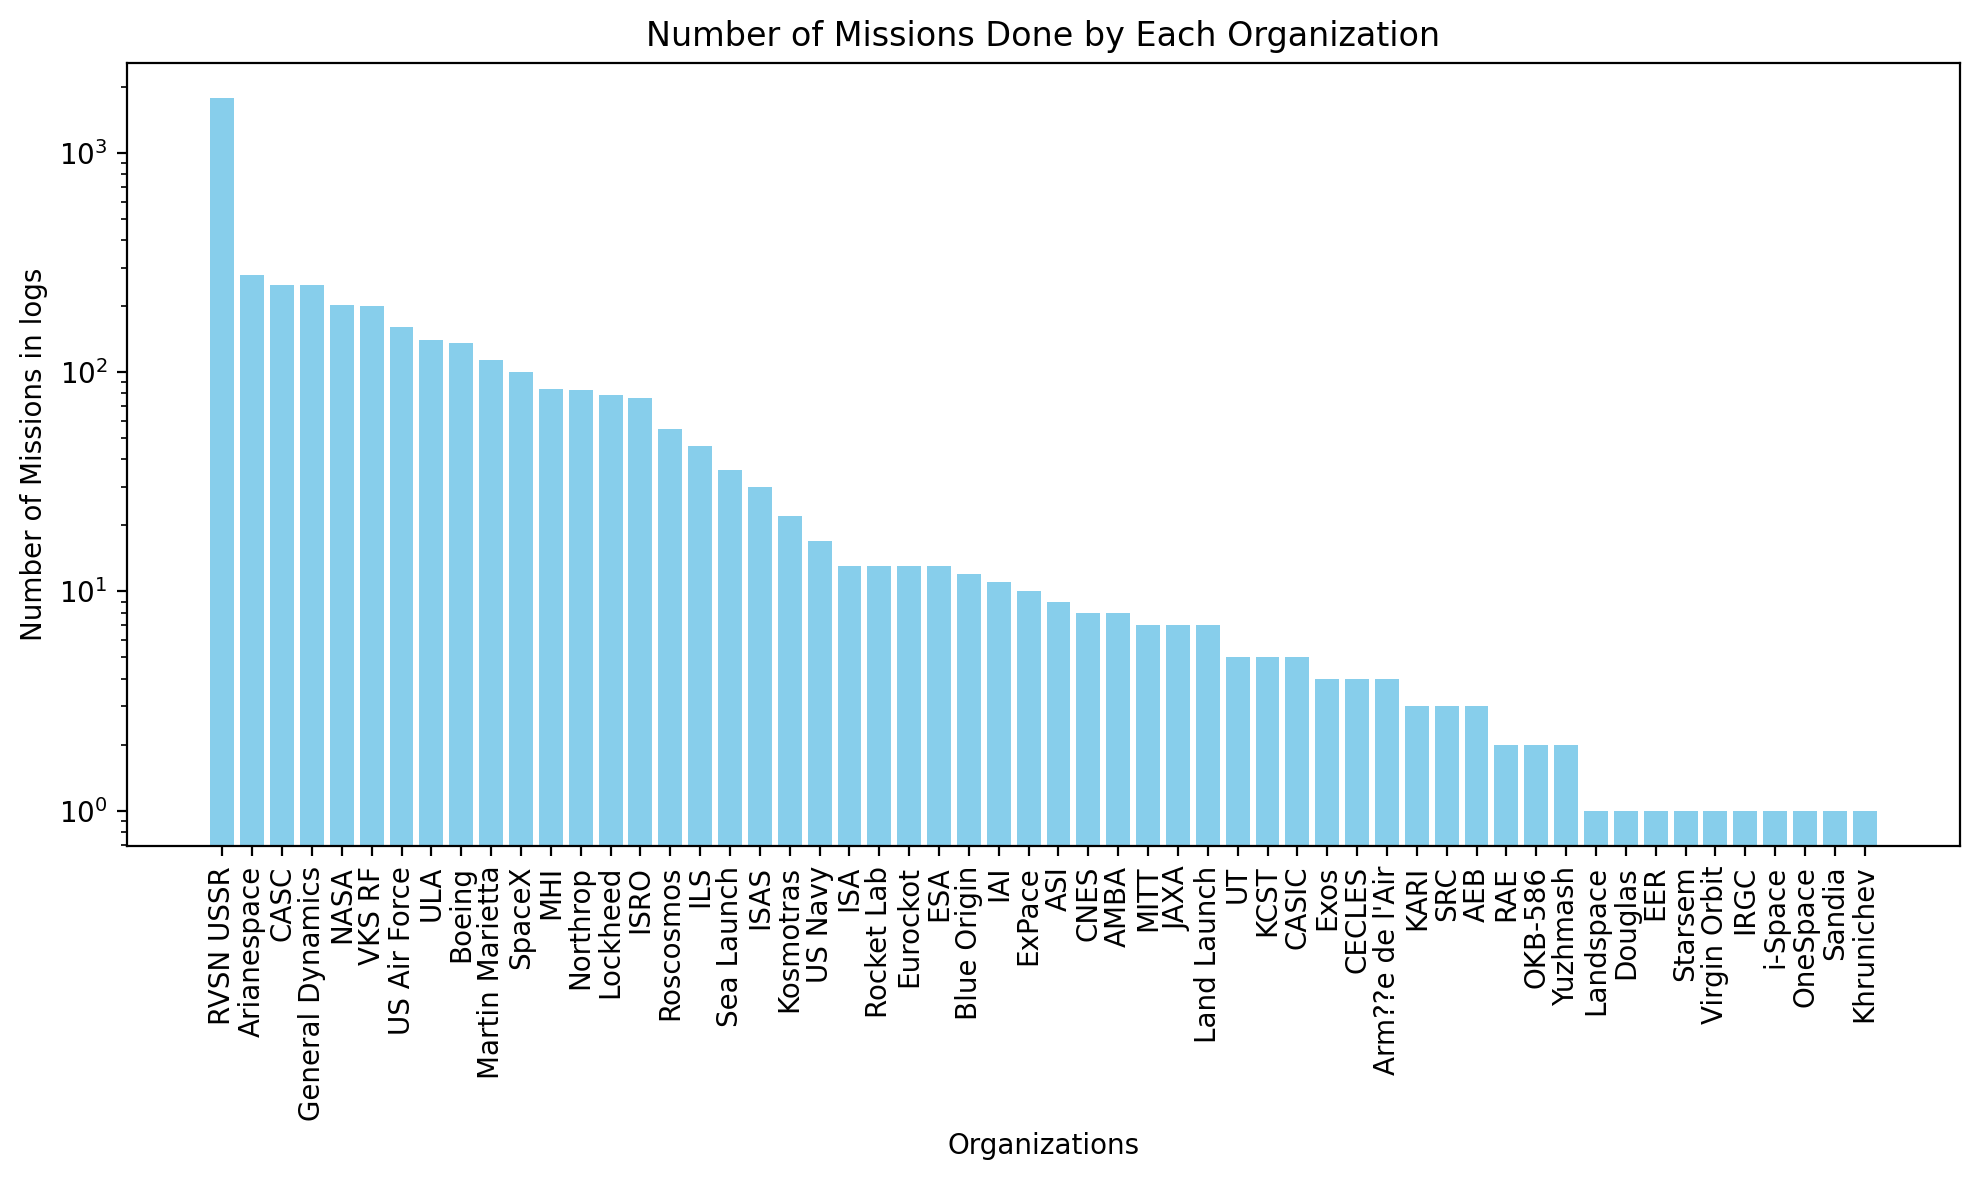

In [14]:
plt.figure(figsize=(10, 6), dpi=200)
plt.xticks(fontsize=10, rotation=90)
plt.bar(launches_per_company.index , launches_per_company.values, color='skyblue')
plt.xlabel('Organizations')
plt.ylabel('Number of Missions in logs')
plt.title('Number of Missions Done by Each Organization')
plt.yscale('log')

ax = plt.gca()

plt.tight_layout()

plt.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned?

In [15]:
active_vs_retired = df_data.Rocket_Status.value_counts()

In [16]:
fig = px.pie(values=active_vs_retired.values, names=active_vs_retired.index, title='Number of Active vs Retired Rockets', hole=0.6,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [17]:
mission_status = df_data.Mission_Status.value_counts()


In [18]:
fig = px.pie(values=mission_status.values, names=mission_status.index, title='Mission Status', hole=0.6,)
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

In [19]:
df_data.head(2)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


# How Expensive are the Launches?

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values).

In [20]:
launch_expense = df_data.Price.value_counts()
launch_expense.index

Index(['450.0', '200.0', '40.0', '62.0', '30.8', '109.0', '50.0', '64.68',
       '29.75', '90.0', '41.8', '48.5', '29.15', '31.0', '29.0', '59.0',
       '69.7', '21.0', '65.0', '35.0', '56.5', '37.0', '164.0', '7.5',
       '1,160.0', '47.0', '25.0', '350.0', '153.0', '45.0', '112.5', '5.3',
       '123.0', '145.0', '85.0', '120.0', '80.0', '115.0', '59.5', '7.0',
       '46.0', '136.6', '63.23', '140.0', '133.0', '190.0', '130.0', '135.0',
       '5,000.0', '39.0', '55.0', '15.0', '20.14', '20.0', '12.0', '28.3'],
      dtype='object', name='Price')

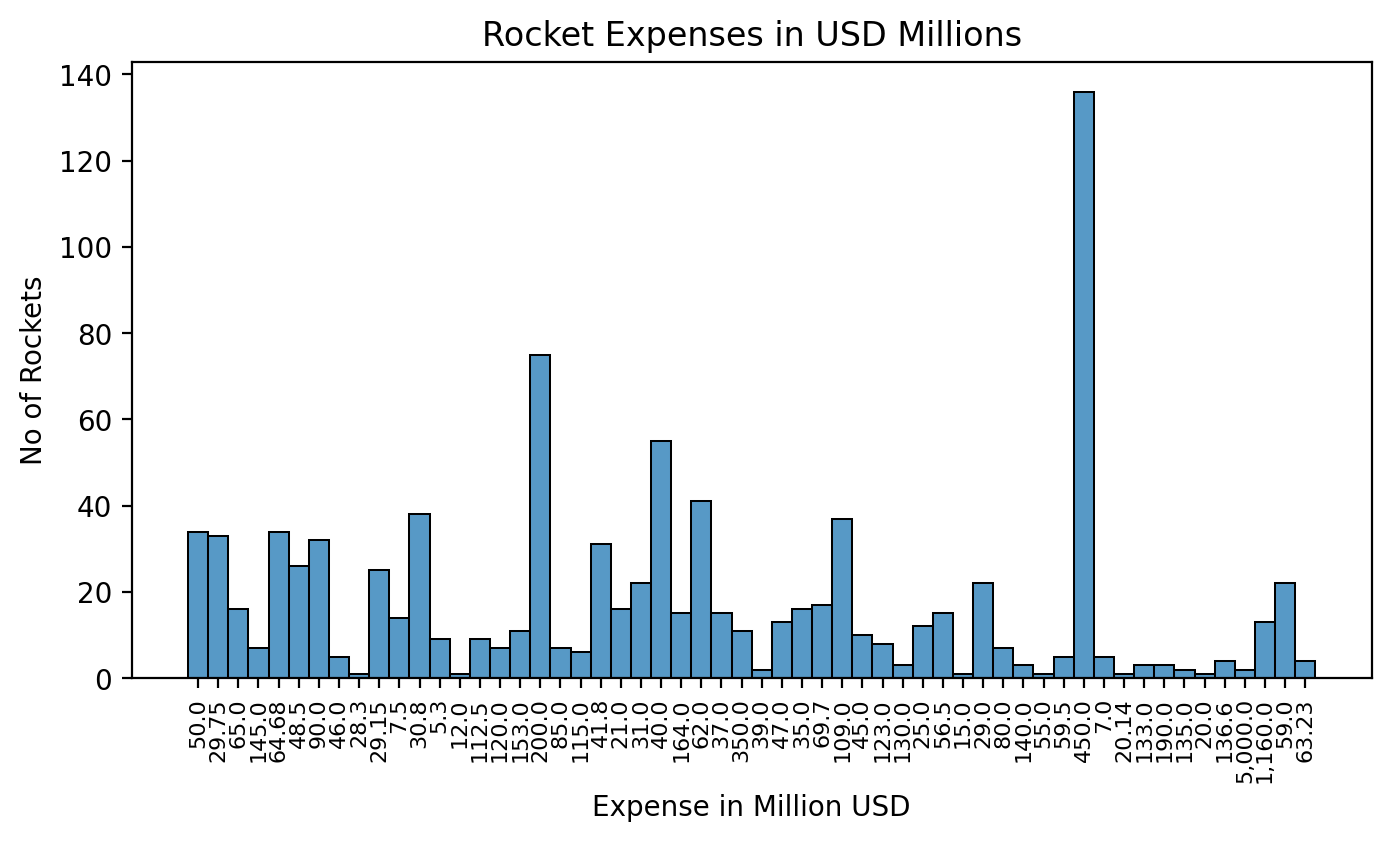

In [21]:
plt.figure(figsize=(8,4), dpi=200)
sns.histplot(df_data.Price, bins=30, kde=False)
plt.xticks(fontsize=8, rotation=90)
plt.xlabel('Expense in Million USD')
plt.ylabel('No of Rockets')
plt.title('Rocket Expenses in USD Millions')
plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map.
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [22]:
df_data['launch_country'] = df_data['Location'].str.split(', ').str[-1]

In [23]:
df_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA


In [24]:
df_data.launch_country.replace({'Pacific Ocean':'USA', 'Russia': 'Russian Federation', 'New Mexico': 'USA', 'Yellow Sea':'China','Iran':'Iran, Islamic Republic of', 'Shahrud Missile Test Site':'Iran, Islamic Republic of', 'Pacific Missile Range Facility': 'USA', 'Barents Sea':'Russian Federation', 'Gran Canaria':'USA','North Korea': "Korea, Democratic People's Republic of", 'South Korea': "Korea, Republic of"}, inplace=True)

In [25]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA


In [26]:
def get_country_alpha3(country_name):
    if country_name is None:
        return None
    country = countries.get(country_name)
    if country is None:
        return None
    return country.alpha3

df_data['launch_country_code'] = df_data['launch_country'].apply(lambda x: get_country_alpha3(x))

In [27]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success,Kazakhstan,KAZ
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success,USA,USA


In [28]:
country_launches = df_data.groupby(['launch_country_code'], as_index=False).agg({'Mission_Status': pd.Series.count})
country_launches.rename(columns={'Mission_Status': 'Total_Launches'}, inplace=True)

In [29]:
fig = px.choropleth(country_launches,
                    locations='launch_country_code',
                    color='Total_Launches',
                    color_continuous_scale = px.colors.sequential.matter)
fig.update_layout(coloraxis_showscale=True)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [30]:
country_failure = df_data[df_data['Mission_Status'] == 'Failure'].groupby('launch_country_code').size()

In [31]:
fig = px.choropleth(
                    locations=country_failure.index,
                    color=country_failure.values,
                    color_continuous_scale = px.colors.sequential.matter)
fig.update_layout(coloraxis_showscale=True)

fig.show()

In [32]:
df_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status.

In [33]:
sun_data = df_data.groupby(['launch_country', 'Organisation'], as_index=False).agg({'Mission_Status':pd.Series.count})
sun_data = sun_data.sort_values('Mission_Status', ascending=False)

In [34]:
fig = px.sunburst(sun_data, path=['launch_country', 'Organisation'], values='Mission_Status', title='Where do Launches take place')

fig.update_layout(xaxis_title='Number of Launches', coloraxis_showscale=False)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [35]:
df_data.head(2)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN


In [36]:
df_data.Price = df_data.Price.str.replace(",", "")

In [37]:
df_data['Price'] = pd.to_numeric(df_data['Price'])

In [38]:
money_spent = df_data.groupby(['Organisation'], as_index=False).agg({'Price':pd.Series.sum})
money_spent.sort_values('Price', ascending=False, inplace=True)
money_spent.head()

,Organisation,Price
35,NASA,"76,280.00"
3,Arianespace,"16,345.00"
48,ULA,"14,798.00"
40,RVSN USSR,"10,000.00"
7,CASC,"6,340.26"


In [39]:
h_bar = px.bar(x=money_spent.Organisation[:20],
               y=money_spent.Price[:20],

               title='Money Spent by Organisations')
h_bar.update_layout(xaxis_title='Money spent in usd Millions',
                    yaxis_title='Organisation')
h_bar.show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [40]:
df_data.head(2)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN


In [41]:
money_per_launch = df_data.groupby(['Organisation'], as_index=False).agg({'Price':pd.Series.mean})
money_per_launch.sort_values('Price', ascending=False, inplace=True)
money_per_launch.head()

,Organisation,Price
40,RVSN USSR,"5,000.00"
35,NASA,511.95
6,Boeing,177.29
3,Arianespace,170.26
48,ULA,151.00


In [42]:
h_bar = px.bar(x=money_per_launch.Organisation[:25],
               y=money_per_launch.Price[:25],

               title='Money Spent by Organisations per launch')
h_bar.update_layout(xaxis_title='Money spent in usd Millions',
                    yaxis_title='Organisation')
h_bar.show()

# Chart the Number of Launches per Year

In [43]:
df_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA


In [44]:
date_parts = df_data['Date'].str.split(", ", expand=True)
date_time_parts = date_parts[0].str.split(" ", expand=True)
time_parts = date_parts[1].str.split(" ", expand=True)
time_parts.head(3)

,0,1,2
0,2020,05:12,UTC
1,2020,04:01,UTC
2,2020,23:57,UTC


In [45]:
date_time_parts.head(3)

,0,1,2
0,Fri,Aug,07
1,Thu,Aug,06
2,Tue,Aug,04


In [46]:
df_data['Year'] = time_parts[0]
df_data['Months'] = date_time_parts[1]
df_data.head(2)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code,Year,Months
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,Aug
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,Aug


In [47]:
launches_per_year = df_data.Year.value_counts().sort_index()
launches_per_year

Year
1957      3
1958     28
1959     20
1960     39
1961     52
       ... 
2016     90
2017     92
2018    117
2019    109
2020     63
Name: count, Length: 64, dtype: int64

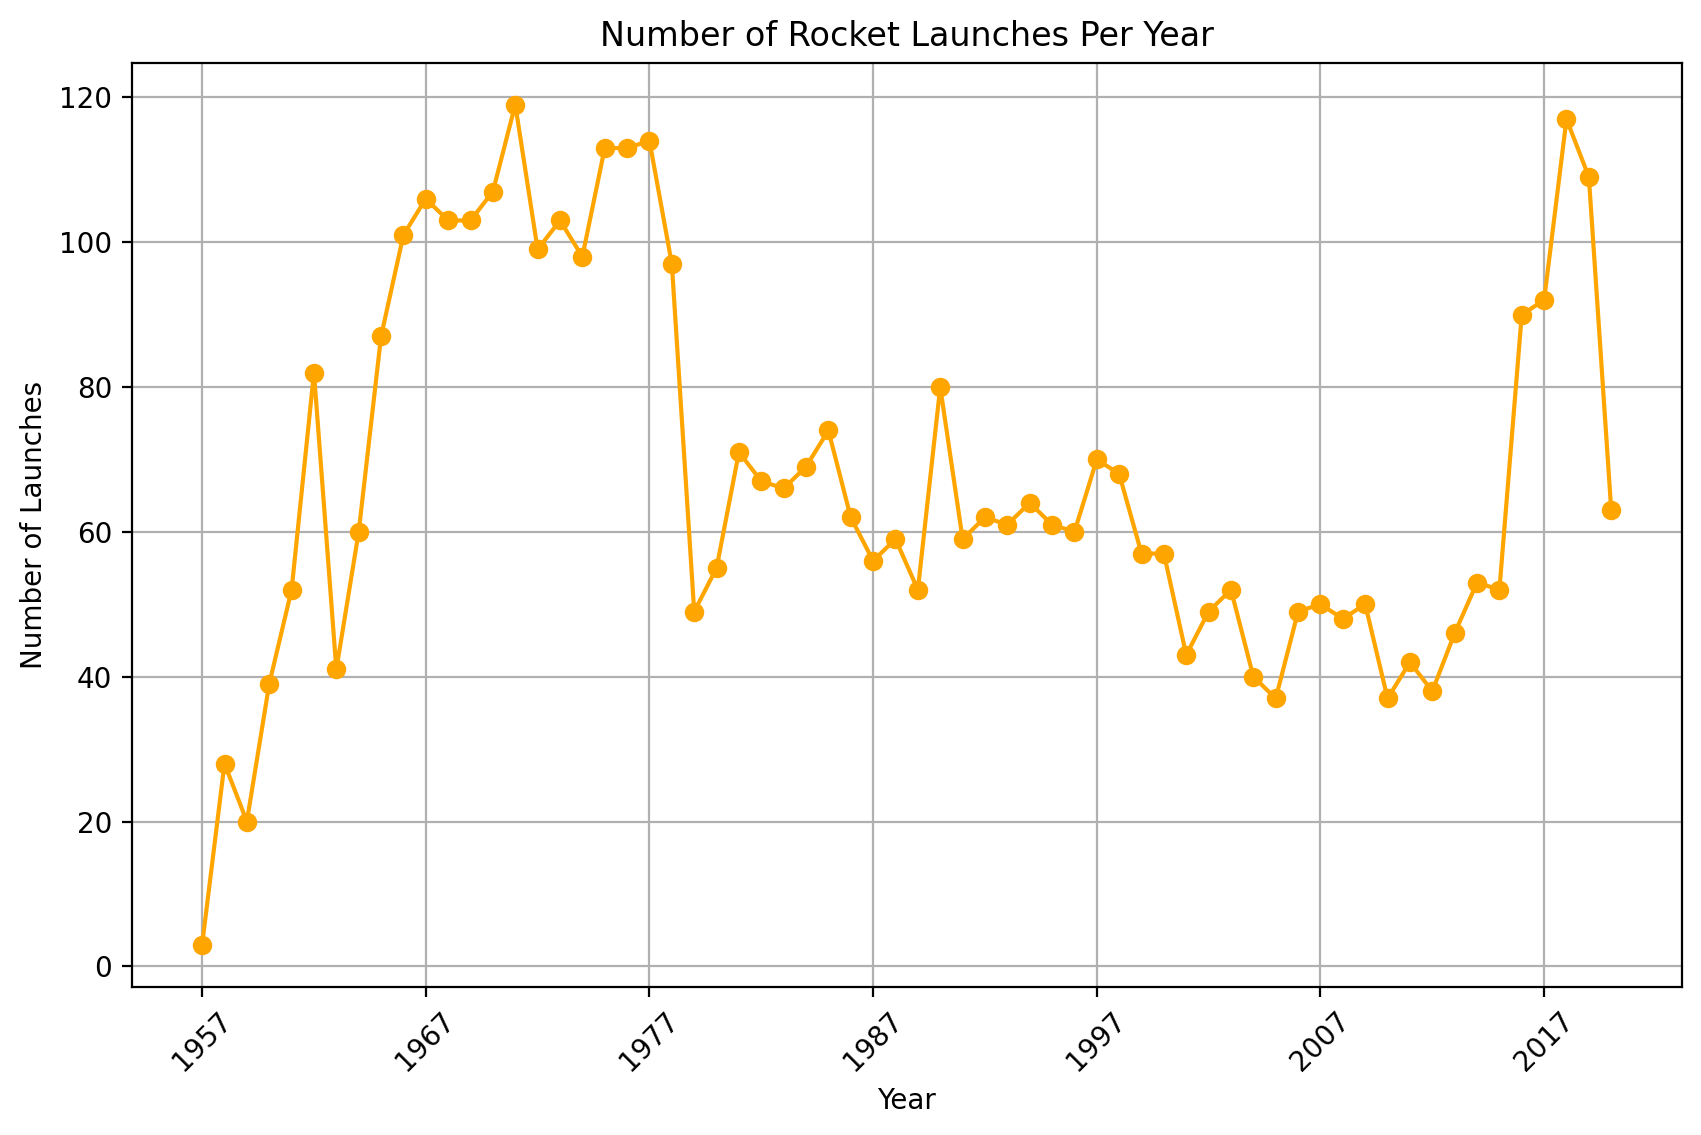

In [48]:
plt.figure(figsize=(10, 6), dpi=200)
launches_per_year.plot(kind='line', marker='o', color='orange')
plt.title('Number of Rocket Launches Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart.

In [49]:
month_launches = df_data.Months.value_counts()

In [50]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_launches.index = pd.Categorical(month_launches.index, categories=month_order, ordered=True)
month_launches = month_launches.sort_index()
month_launches

Jan    268
Feb    336
Mar    353
Apr    383
May    326
Jun    402
Jul    351
Aug    373
Sep    365
Oct    381
Nov    336
Dec    450
Name: count, dtype: int64

In [51]:
roll_df = month_launches.rolling(window=4).mean()

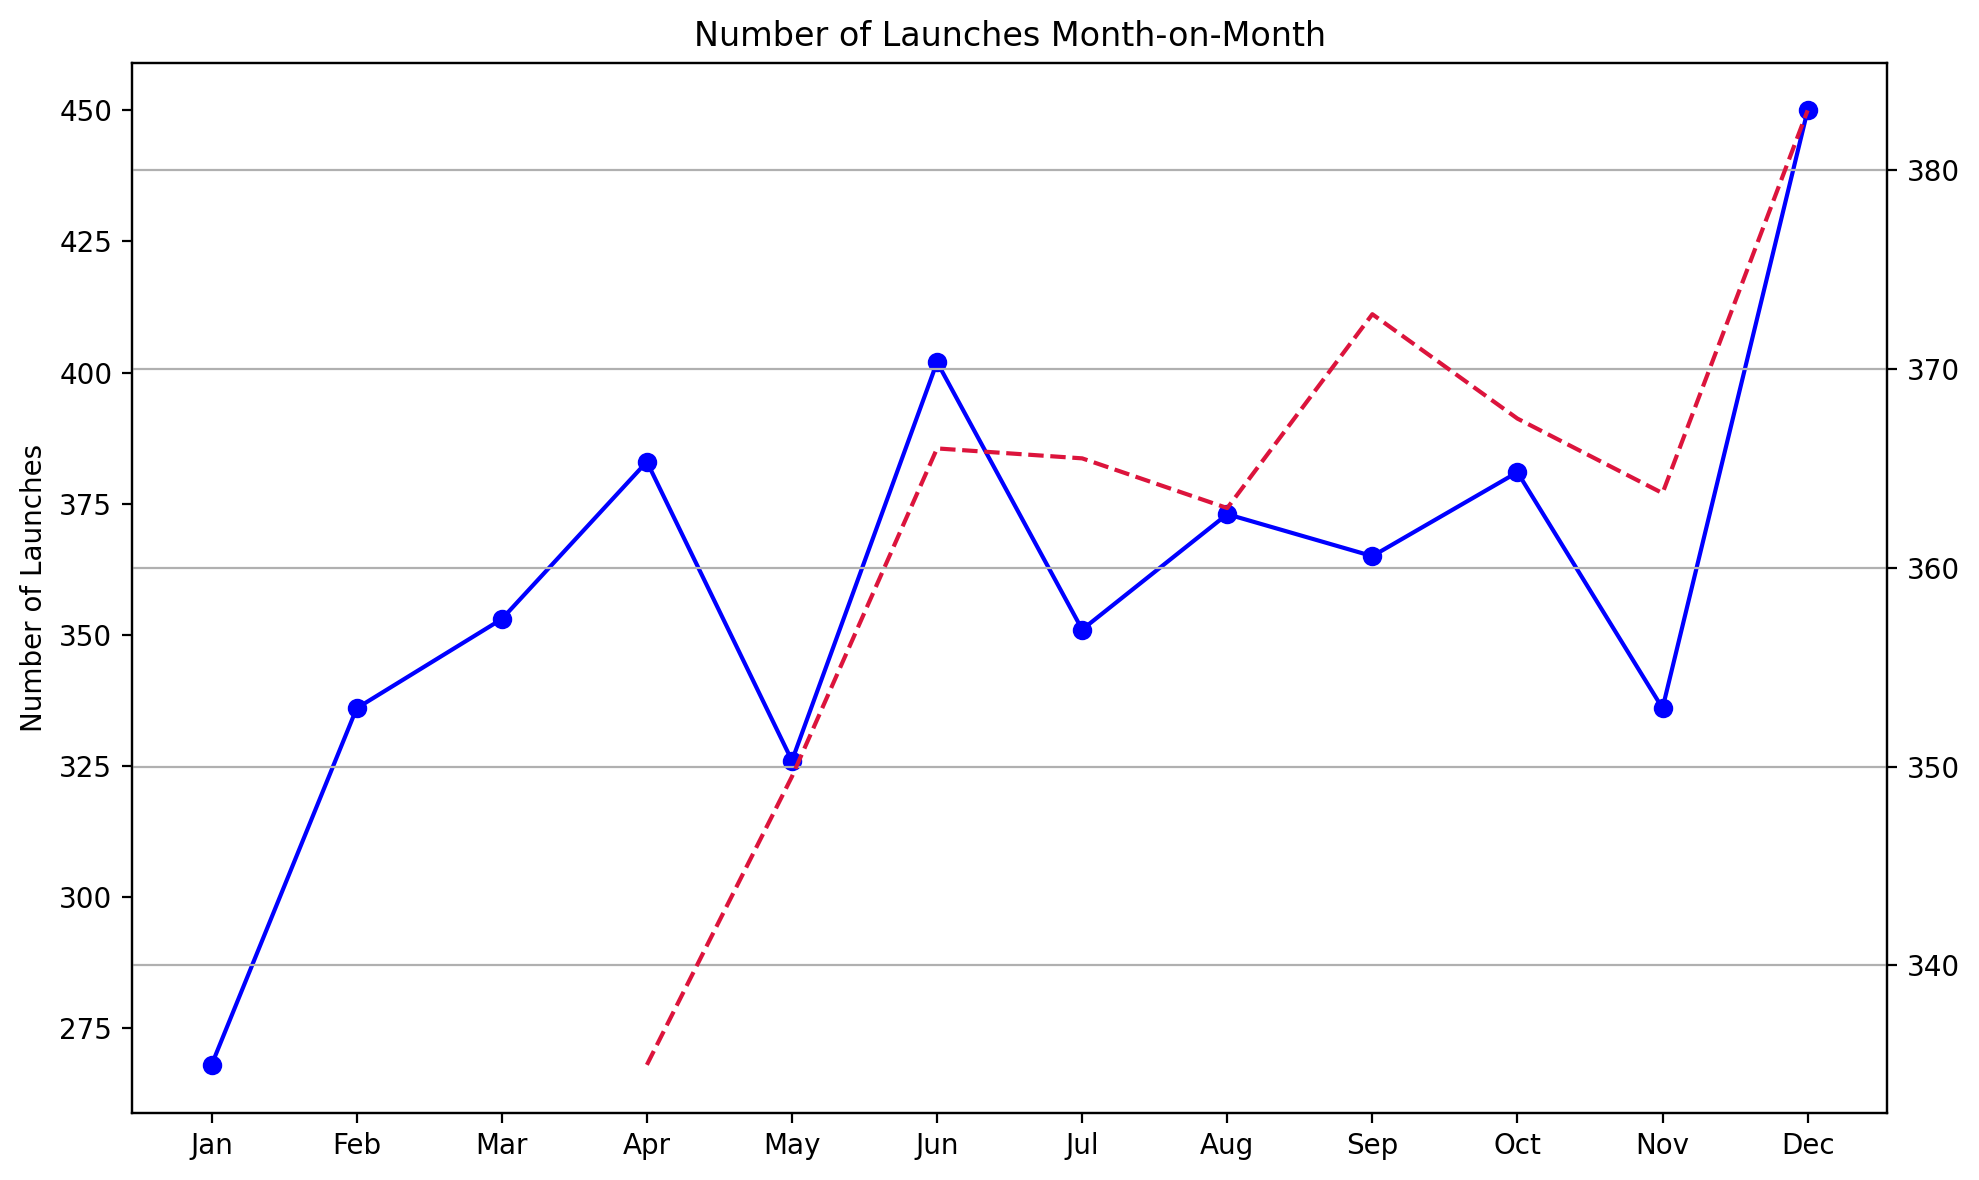

In [52]:
plt.figure(figsize=(10, 6), dpi = 200)
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(month_launches.index, month_launches.values, marker='o', color='b')
ax2.plot(month_launches.index, roll_df.values, linestyle='--', color='crimson')
plt.title('Number of Launches Month-on-Month')
plt.xlabel('Month')
ax1.set_ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

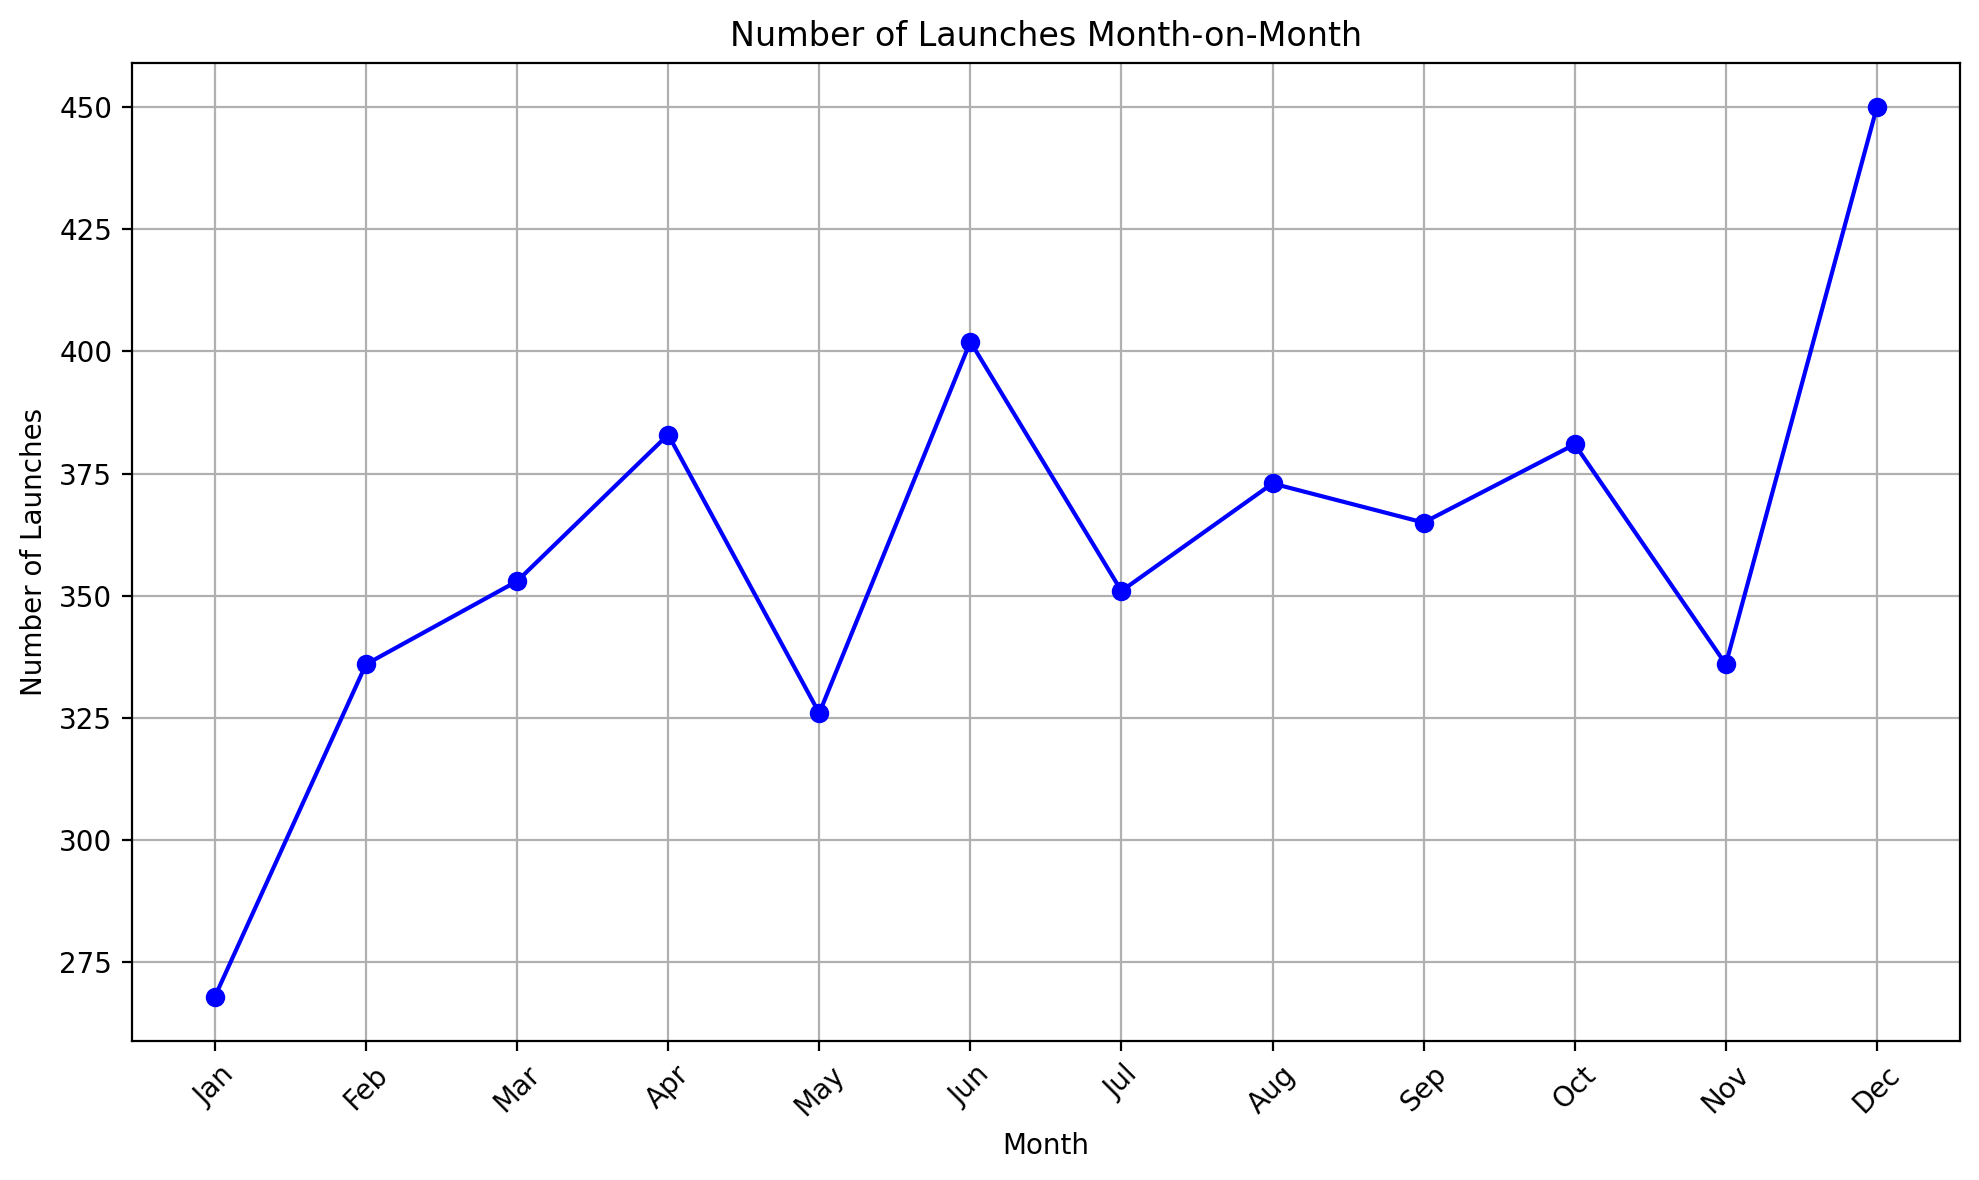

In [53]:
plt.figure(figsize=(10, 6), dpi = 200)

plt.plot(month_launches.index, month_launches.values, marker='o', color='b')

plt.title('Number of Launches Month-on-Month')
plt.xlabel('Month')
plt.ylabel('Number of Launches')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()


plt.show()

# How has the Launch Price varied Over Time?

Create a line chart that shows the average price of rocket launches over time.

In [54]:
launch_price = df_data.groupby(['Year'], as_index=False).agg({'Price': pd.Series.mean})
launch_price.sort_values('Price', ascending=False)[:20]

,Year,Price
30,1987,"1,687.20"
31,1988,"1,193.16"
16,1973,"1,160.00"
13,1970,"1,160.00"
14,1971,"1,160.00"
15,1972,"1,160.00"
12,1969,609.50
24,1981,450.00
28,1985,408.08
34,1991,391.43


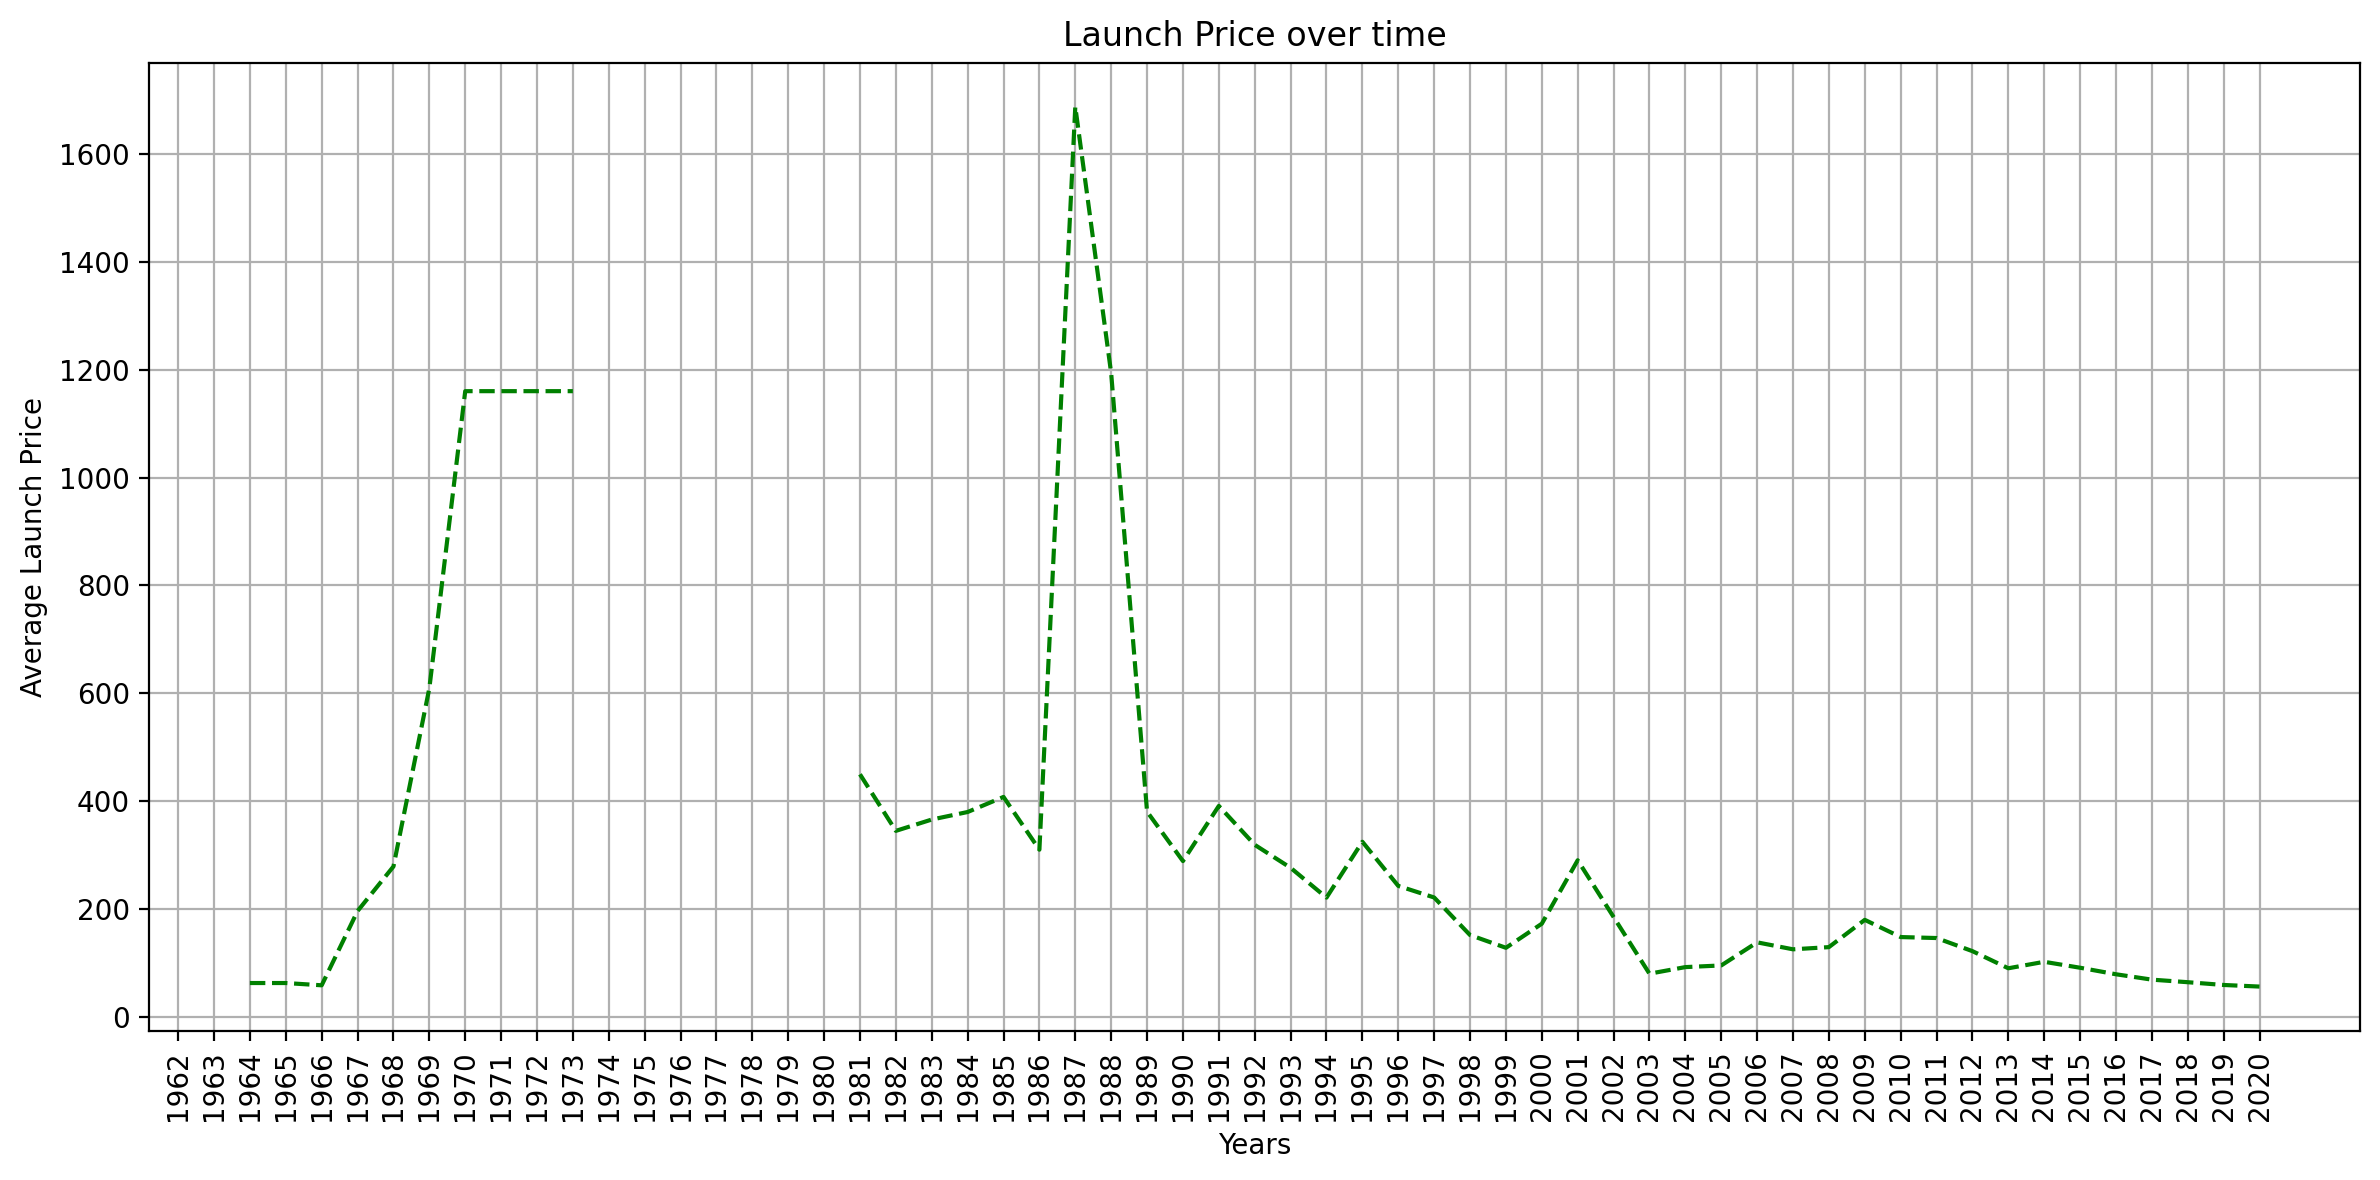

In [55]:
plt.figure(figsize=(12, 6), dpi = 200)

plt.plot(launch_price.Year, launch_price.Price, linestyle='--', color='green')

plt.title('Launch Price over time')
plt.xlabel('Years')
plt.ylabel('Average Launch Price')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()


plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations.

How has the dominance of launches changed over time between the different players?

In [56]:
df_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code,Year,Months
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,Aug
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,Aug
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,Aug


In [57]:
organisation_launches = df_data.groupby(['Organisation'], as_index=False).agg({'Detail': pd.Series.count})
organisation_launches.rename(columns={'Detail':'Num_launches'}, inplace=True)
organisation_launches.sort_values('Num_launches', ascending=False, inplace=True)

In [58]:
h_bar = px.bar(x=organisation_launches.Organisation[:10],
               y=organisation_launches.Num_launches[:10],

               title='Top 10 organisation')
h_bar.update_layout(xaxis_title='Organisation Name',
                    yaxis_title='Number of Launches')
h_bar.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991.

In [59]:
cold_war_end = 1991

In [60]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code,Year,Months
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,Aug
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,Aug
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,Aug
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Kazakhstan,KAZ,2020,Jul
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA,2020,Jul


In [61]:
df_data.Year = pd.to_numeric(df_data.Year)

In [62]:
df_cold_war = df_data.replace({'Russian Federation':'USSR', 'Kazakhstan':'USSR'})


In [63]:
num_launch = df_cold_war.query("(launch_country == 'USA' or launch_country == 'USSR') and Year < 1991")['launch_country'].value_counts()
num_launch

launch_country
USSR    1741
USA      644
Name: count, dtype: int64

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches.

In [64]:
fig = px.pie(values=num_launch.values, names=num_launch.index, title='Number of Launches')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [65]:
filtered_df = df_cold_war[(df_cold_war['Year'] <= 1991) & (df_cold_war['launch_country'].isin(['USA', 'USSR']))]


In [66]:
result = filtered_df.groupby(['Year', 'launch_country'], as_index=False).agg({'Detail':pd.Series.count})


In [67]:
g_bar = px.bar(result,
               x='Year',
               y='Detail',
               title='Total number of launches year on year',
               color='launch_country',
               barmode='group')
g_bar.update_layout(xaxis_title='Launch Country',
                    yaxis_title='Number of Launches',
                    xaxis={'categoryorder':'total descending'},

                    )
g_bar.show()

## Chart the Total Number of Mission Failures Year on Year.

In [68]:
filtered_df.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code,Year,Months
1718,1718,1718,RVSN USSR,"Site 175/58, Baikonur Cosmodrome, Kazakhstan","Fri Dec 20, 1991",Rokot/Briz K | GVM Demo Flight,StatusRetired,NaN,Success,USSR,KAZ,1991,Dec
1719,1719,1719,Yuzhmash,"Site 32/2, Plesetsk Cosmodrome, Russia","Wed Dec 18, 1991 03:54 UTC",Tsyklon-3 | Intercosmos 25 & Magion 3,StatusRetired,NaN,Success,USSR,RUS,1991,Dec
1721,1721,1721,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA","Sat Dec 07, 1991 22:47 UTC",Atlas II | Eutelsat 2F3,StatusRetired,NaN,Success,USA,USA,1991,Dec


In [69]:
df_fail_cold = filtered_df[filtered_df['Mission_Status'] == 'Failure']
mission_failure_cold_war = df_fail_cold.groupby(['Year', 'launch_country'], as_index=False).agg({'Mission_Status':pd.Series.count})

In [70]:
g_bar = px.bar(mission_failure_cold_war,
               x='Year',
               y='Mission_Status',
               title='Total number of Failure year on year',
               color='launch_country',
               barmode='group')
g_bar.update_layout(xaxis_title='Launch Country',
                    yaxis_title='Number of Failures',
                    xaxis={'categoryorder':'total descending'},

                    )
g_bar.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time?

In [71]:
df_data.head(3)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,launch_country,launch_country_code,Year,Months
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA,2020,Aug
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN,2020,Aug
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success,USA,USA,2020,Aug


In [82]:
failed_over_years = df_data[df_data['Mission_Status'] == 'Failure'].groupby('Year').size() / df_data.groupby('Year').size() * 100

In [83]:
h_bar = px.bar(x=failed_over_years.index,
               y=failed_over_years.values,

               title='Failure percent over years ')
h_bar.update_layout(xaxis_title='Years',
                    yaxis_title='Percentage')
h_bar.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches?

In [72]:
launch_counts = df_data.groupby(['Year', 'launch_country'], as_index=False).agg({'Detail': pd.Series.count})


In [73]:
fig = px.bar(launch_counts,
             x='Detail',
             y='Year',
             orientation='h',
             color='launch_country',
             color_continuous_scale='Viridis')
fig.update_layout(title='Leading Countries',
                  xaxis_title='Number of Launches',
                  yaxis_title='Year',
                  coloraxis_showscale=False)
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020?

In [74]:
organisation_counts = df_data.groupby(['Year', 'Organisation'], as_index=False).agg({'Detail': pd.Series.count})

In [75]:
fig = px.bar(organisation_counts,
             x='Detail',
             y='Year',
             orientation='h',
             color='Organisation',
             color_continuous_scale='Viridis')
fig.update_layout(title='Organisation launches',
                  xaxis_title='Number of Launches',
                  yaxis_title='Year',
                  coloraxis_showscale=False)
fig.show()